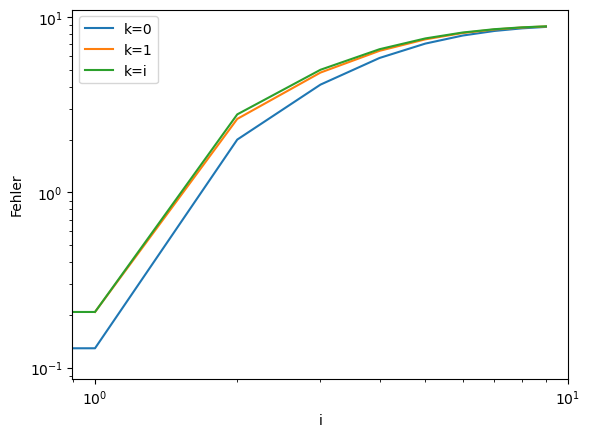

In [74]:
import numpy as np


def f(x): 
    return (x-1)**(1/5)


def intf(x0):
    return (2)**(1/5) * 5 / 3 - 5 / 6 * (x0-1)**(6/5)


def romberg(start):
    stop = 3
    float2 = np.float64(2)

    n_range = np.arange(0, 10)
    h_range = (stop - start) * float2 ** -n_range

    T_nn = h_range[1]*(f(start)+f(stop))
    T_arr = np.empty([10,10])
    T_arr[0, 0] = T_nn

    for n in n_range[1:10]:
        i_range = np.arange(0, 2**(n)-1)
        m_n = h_range[n-1] * np.sum(start + float2 * i_range * h_range[n])
        T_arr[0, n] = 1/2 * (T_arr[0, n-1] + m_n)
    
    for k in n_range[1:10]:
        T_arr[k,k:] = (4**k * T_arr[k-1,k:] - T_arr[k-1,k-1:-1]) / (4**k - 1)


    return T_arr



import matplotlib.pyplot as plt


start = 1.2
error = abs(romberg(start) - intf(start))
i_range = np.arange(0,10)


fig, ax = plt.subplots()

for k in [0,1]:
    plot_range = i_range[k:]
    ax.loglog(plot_range, error[k,plot_range], label='k=%i' %k)

ax.loglog(i_range, error[i_range,i_range], label='k=i')
ax.set(xlabel='i', ylabel='Fehler')
ax.legend()

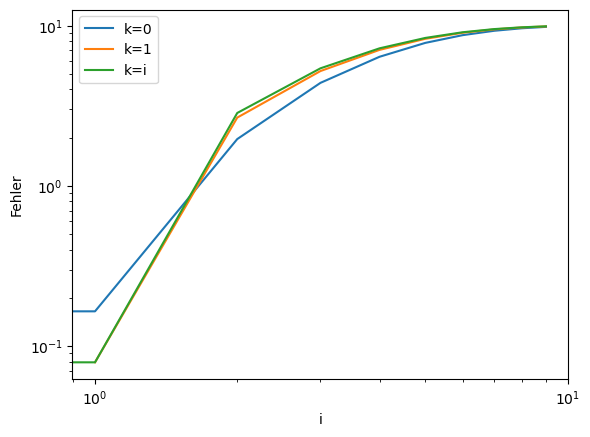

In [75]:
import matplotlib.pyplot as plt


start = 1.005
error = abs(romberg(start) - intf(start))
i_range = np.arange(0,10)


fig, ax = plt.subplots()

for k in [0,1]:
    plot_range = i_range[k:]
    ax.loglog(plot_range, error[k,plot_range], label='k=%i' %k)

ax.loglog(i_range, error[i_range,i_range], label='k=i')
ax.set(xlabel='i', ylabel='Fehler')
ax.legend()

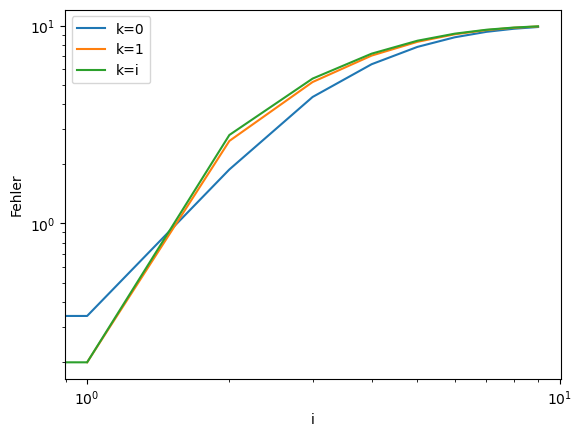

In [76]:
import matplotlib.pyplot as plt


start = 1
error = abs(romberg(start) - intf(start))
i_range = np.arange(0,10)


fig, ax = plt.subplots()

for k in [0,1]:
    plot_range = i_range[k:]
    ax.loglog(plot_range, error[k,plot_range], label='k=%i' %k)

ax.loglog(i_range, error[i_range,i_range], label='k=i')
ax.set(xlabel='i', ylabel='Fehler')
ax.legend()